# Importing Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Loading the Dataset

In [99]:
data = pd.read_csv(r"C:\Users\Lapotop Land\Downloads\IRIS.csv")

In [100]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploring the Dataset

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [102]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [103]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [104]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Statistical Summary

In [105]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for Missing Values

In [106]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Distribution of Each Feature

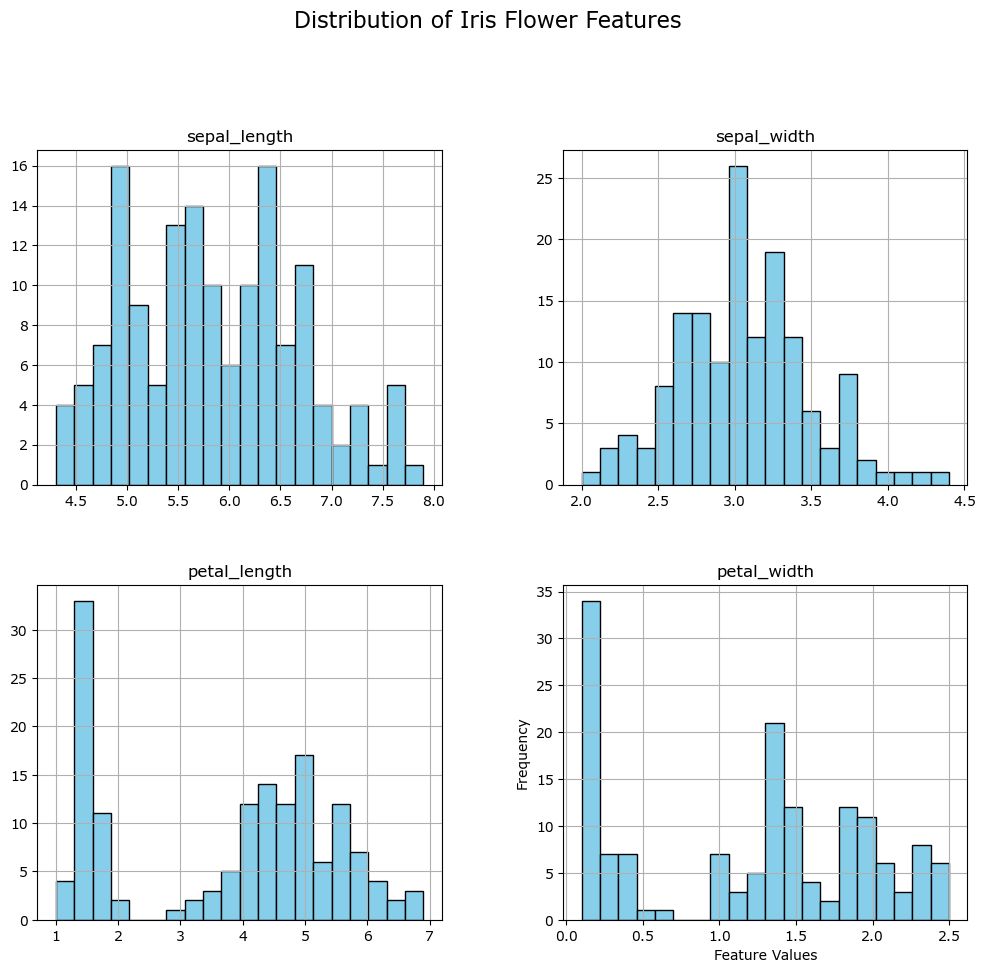

In [107]:
data.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black') 
plt.suptitle('Distribution of Iris Flower Features', fontsize=16, y=1.02) 
plt.xlabel('Feature Values') 
plt.ylabel('Frequency')
plt.show()

# Relationships between features grouped by Species

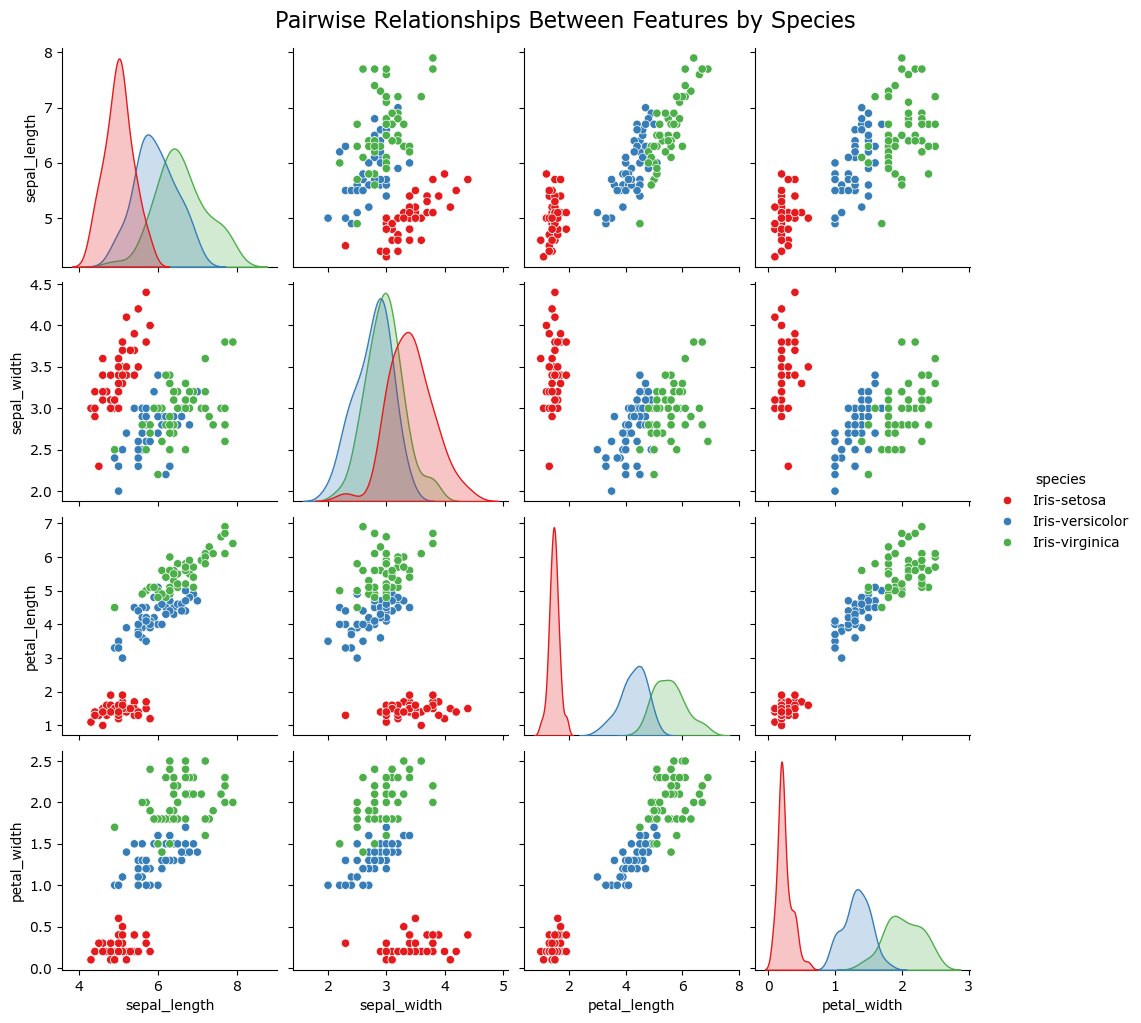

In [108]:
sns.pairplot(data, hue='species', palette='Set1') 
plt.suptitle('Pairwise Relationships Between Features by Species', fontsize=16, y=1.02) 
plt.show()

# Count of each Species

In [109]:
species_counts = data['species'].value_counts()

C:\Users\Lapotop Land\AppData\Local\Temp\ipykernel_2588\1659983527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_counts.index, y=species_counts.values, palette='Set2')


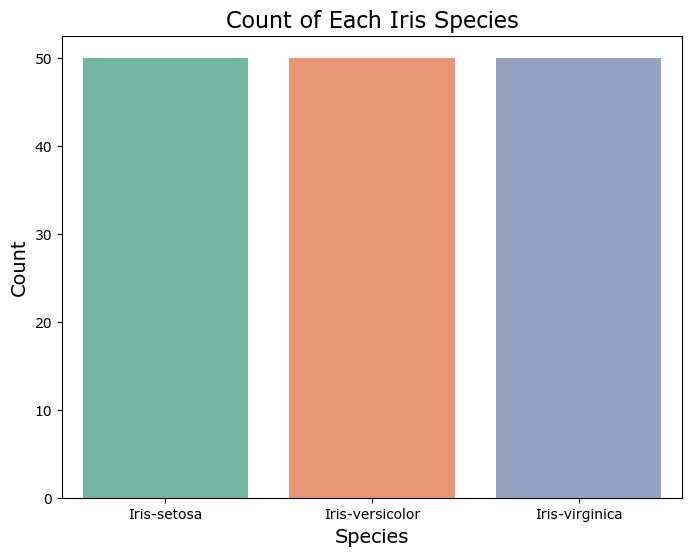

In [110]:
# Create a bar plot for species counts 
plt.figure(figsize=(8, 6)) 
sns.barplot(x=species_counts.index, y=species_counts.values, palette='Set2')
plt.title('Count of Each Iris Species', fontsize=16) 
plt.xlabel('Species', fontsize=14) 
plt.ylabel('Count', fontsize=14) 
plt.show()

# Splitting Data into X and y

In [111]:
X = data.drop('species', axis=1)
y = data['species']

# Splitting the Data into Training and Test Sets

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the Data

In [113]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Training and Evaluation

## Support Vector Classifier

In [114]:
#Training a Support Vector Classifier 
svc_model = SVC(kernel='linear', random_state=42) 
svc_model.fit(X_train, y_train) 

SVC(kernel='linear', random_state=42)

In [115]:
#Predictions
svc = svc_model.predict(X_test) 

In [116]:
# Evaluation 
print("Support Vector Classifier Accuracy:", accuracy_score(y_test, svc))

Support Vector Classifier Accuracy: 0.9333333333333333


In [117]:
print("Classification Report:\n", classification_report(y_test, svc))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.81      1.00      0.90        13

       accuracy                           0.93        45
      macro avg       0.94      0.92      0.92        45
   weighted avg       0.95      0.93      0.93        45



## Decision Tree Classifier 

In [118]:
# Training a Decision Tree Classifier 
dt_model = DecisionTreeClassifier(random_state=42) 
dt_model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

In [119]:
# Prediction 
y_pred_dt = dt_model.predict(X_test) 

In [120]:
# Evaluation
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt)) 

Decision Tree Classifier Accuracy: 0.9555555555555556


In [121]:
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



## Random Forest Classifier

In [122]:
# Training a Random Forest Classifier 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [123]:
# Prediction
y_pred_rf = rf_model.predict(X_test) 

In [124]:
# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9777777777777777


In [125]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



# Comparing Model Accuracies 

In [126]:
models = pd.DataFrame({ 'Model': ['SVC', 'Decision Tree', 'Random Forest'], 'Accuracy': [accuracy_score(y_test, svc),
                         accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]}) 
print(models)

           Model  Accuracy
0            SVC  0.933333
1  Decision Tree  0.955556
2  Random Forest  0.977778


C:\Users\Lapotop Land\AppData\Local\Temp\ipykernel_2588\1448730659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=models, palette='Blues_d')


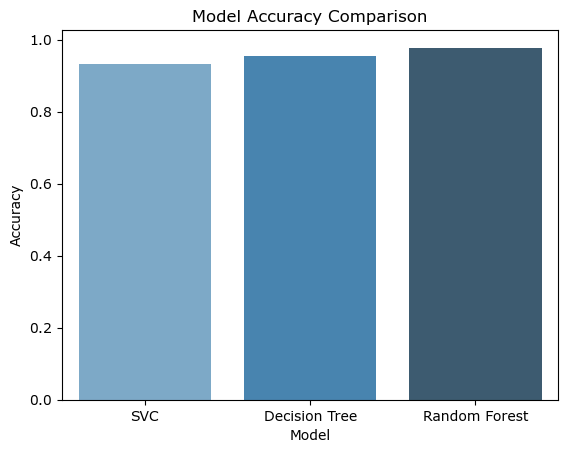

In [127]:
# Plotting the comparison 
sns.barplot(x='Model', y='Accuracy', data=models, palette='Blues_d') 
plt.title('Model Accuracy Comparison')
plt.show()